Hello Lauren,

Here are out answers to the questions below; some of our answers are located inside the cells below and are written as comments as well.

1. How did you clean the data? What columns/rows did you keep? Which ones did you get rid of? Why? What missing data did you fill in? How? Why?

Going into the project, we wanted to keep all of the columns with missing data even if the majority of the data was missing—instead opting to replace the missing values with 0 (not the average for a specific reason). The reason we did not eliminate the rows is because we desired user preference. For example, if somebody only wanted extremly high G Forces in their roller coaster, we wanted that person to recieve a roller coaster with actually high G Forces, not an average. We understand that we are penalizing the roller coasters with few values, but we would rather penalize them than present a false positive to our user. Therefore the user can see that, if 0 is listed in other columns, the program is implying that the data is not listed (as how can a roller coaster have a speed of 0).

2. What interesting observations did you find in the data? (For example: What is the oldest rollercoaster?)

Please see cells below the #Ranked Roller Coasters cell.

3. What graphs did you find by plotting numerical variables? Any interesting scatterplots or histograms? Do any of the scatterplots warrant a regression curve? If so, can you create one and interpret it?

Please see #Graph cells locacted toward the bottom of the notebook.

4. Can you make any sense out of the CoasterBuzz rankings? If so, what factors do they seem to be weighting highly? If not, why might you be having trouble finding a pattern? https://coasterbuzz.com/RollerCoasters/Top100

Please see the #CoasterBuzz rankings cells located toward the bottom of the notebook (below #Graphs).

5. Can you come up with your own ranking system? If you sort according to your own ranking, what are your top 10 roller coasters? How do they compare to the CoasterBuzz rankings?

If you run the cell below and do not set your preferences, you can see our top ten choices. There does not seem to be a strong correlation with the CoasterBuzz rankings, but half of them do have very high (nearly 5) CoasterBuzz rankings—this means that we may values some of the same aspects as CoasterBuzz! These are our top ten (from best to worst):

Steel Dragon 2000, Millennium Force, Fury 325, Fujiyama, Beast, Ultimate, Leviathan, Voyage, Desperado, Formula, Rossa

In [6]:
#Ranked Roller Coasters

import pandas as pd
import numpy as np

def clean(file):
    """This function elimates specific errors found in the data
    as well as strips the columns of white space and fills all NaNs with 0.
    It takes the file name as input and returns the cleaned dataframe as an output."""
    rc = pd.read_csv(file)
    rc.loc[111, "Height (feet)"] = 200
    rc.columns = rc.columns.str.strip()
    rc['Height (feet)'] = rc['Height (feet)'].astype(float)
    rc = rc.fillna(0)
    return rc

def get_weights(cols):
    """This function takes in the columns one would like to evaluate (set by programmer not user)
    and produces the valuations of the columns (how important each of them are is set by the user).
    It returns the set valuations as a dictionary."""
    weights = {}
    question = input('Would you like to specify your preferences? (only "y" or "n" will be accepted): ')
    if question.lower().strip() not in ['y','n']:
        print('ERROR: only enter "y" for yes or "n" for no')
        return get_weights(cols)
    elif question.lower().strip() == 'y':
        print(f'''You have 100 points to assign to {len(cols)} factors ({", ".join(cols)})
Faliure to enter NUMERIC values will reset your values.''')
        points = 100
        for col in cols:
            if points < 0:
                print("ERROR: Please be aware that you only have 100 points.")
                return get_weights(cols)
            if points == 0:
                print(f"""\nYou have {points} left.
Therefore {col} has been set to 0.""")
                weights[col] = 0
                continue
            print(f"\nPoints left: {points}")
            pts = input(f"How many points would you like to allocate to {col}: ")
            try:
                weights[col] = float(pts.lower().strip())/100
                points -= float(pts.lower().strip())
            except ValueError:
                print("ERROR: Only enter NUMERIC values")
                return get_weights(cols)
        return weights
            
    elif question.lower().strip() == 'n':
        weights['Height (feet)'] = 0.2
        weights['Speed (mph)'] = 0.1
        weights['Length (feet)'] = 0.05
        weights['Number of Inversions'] = 0.05
        weights['Drop (feet)'] = 0.1
        weights['Duration (seconds)'] = 0.05
        weights['G Force'] = 0.35
        weights['Vertical Angle (degrees)'] = 0.1
        return weights
    
def fix_duration(df):
    """This function converts the duration of the rollercoaster to seconds.
    It takes in the dataframe as an input and returns the fixed dataframe."""
    for index, time in enumerate(df['Duration (min:sec)']):
        try:
            df.loc[int(index), "Duration (min:sec)"] = (int(time.split(":")[0])*60) + int(time.split(":")[-1])
        except:
            continue
    df = df.rename(columns = {"Duration (min:sec)":"Duration (seconds)"})

    return df

def replace_Os(df, cols):
    """This functions deals with columns that are set as objects instead of floats.
    It takes in the dataframe and evaluation columns as inputs and outputs the cleaned dataframe."""
    bad_cols = []
    for col in cols:
        try:
            df[col] = df[col].astype(float)
            df[col] = df[col].fillna(0)
        except:
            bad_cols += [col]
    for coll in bad_cols:
        for index, element in enumerate(df[coll]):
            if type(element) != float:
                try:
                    df.loc[int(index),coll] = float(df.loc[int(index),coll])
                except:
                    df.loc[int(index),coll] = 0
                    
    return df

def gen_rank(df, weights):
    """This function takes the dataframe and user specific weights and
    outputs a new dataframe with a new rank column."""
    df['Personal Rank'] = 0
    for key, value in weights.items():
        df['Personal Rank'] += df[key]*value
    return df

def main():
    rc = clean('rollercoaster.csv')
    num_cols = ['Height (feet)', 'Speed (mph)', 'Length (feet)', 'Number of Inversions',
        'Drop (feet)','Duration (seconds)', 'G Force', 'Vertical Angle (degrees)']
    weights = get_weights(num_cols)
    rc = fix_duration(rc)
    rc = replace_Os(rc, num_cols)
    rc = gen_rank(rc, weights)
    rc = rc.sort_values(by = ['Personal Rank'], ascending = False).reset_index(drop = True)
    top_ten = rc.head(10)
    top_ten.to_csv("Top Ten Roller Coasters.csv")
    print('\n\nA file has been written in the folder of this Notebook with your Top Ten Roller Coasters!')
    
if __name__ == "__main__":
    main()

Would you like to specify your preferences? (only "y" or "n" will be accepted): 34567u8i9o
ERROR: only enter "y" for yes or "n" for no
Would you like to specify your preferences? (only "y" or "n" will be accepted): 56789o
ERROR: only enter "y" for yes or "n" for no
Would you like to specify your preferences? (only "y" or "n" will be accepted): 56789
ERROR: only enter "y" for yes or "n" for no
Would you like to specify your preferences? (only "y" or "n" will be accepted): y
You have 100 points to assign to 8 factors (Height (feet), Speed (mph), Length (feet), Number of Inversions, Drop (feet), Duration (seconds), G Force, Vertical Angle (degrees))
Faliure to enter NUMERIC values will reset your values.

Points left: 100
How many points would you like to allocate to Height (feet): 20

Points left: 80.0
How many points would you like to allocate to Speed (mph): 2000
ERROR: Please be aware that you only have 100 points.
Would you like to specify your preferences? (only "y" or "n" will be a

In [109]:
import pandas as pd
roller = pd.read_csv('rollercoaster.csv')

#roller.drop(columns = ['G Force','Vertical Angle (degrees)','Drop (feet)','CoasterBuzz Ranking'],inplace = True)
roller['Duration (min:sec)']= roller['Duration (min:sec)'].fillna('0:00')
#roller

#roller.columns
roller.at[111, 'Height (feet)'] = 200
roller['Height (feet)'] = roller['Height (feet)'].astype(float)
#roller.info()
# Max/Min Height:
print('Maximin Height', roller['Height (feet)'].max())
print('Minimin Height', roller['Height (feet)'].min())
roller_max = roller.loc[roller['Height (feet)'] == 456]
print('Max height rollercoaster', roller_max['Name'])
roller_min = roller.loc[roller['Height (feet)'] == 29]
print('Min height rollercoaster', roller_min['Name'] )

Maximin Height 456.0
Minimin Height 29.0
Max height rollercoaster 146    Kingda Ka
Name: Name, dtype: object
Min height rollercoaster 263    Terminator Salvation: The Coaster
Name: Name, dtype: object


In [143]:
#Oldest/Youngest rollercoaster
#roller.info()
print('The oldest:', roller['Year/Date Opened'].max())
print('The youngest:', roller['Year/Date Opened'].min())

The oldest: 2018
The youngest: 1924


In [111]:
roller.columns = roller.columns.str.strip() 
#roller.columns
roller = roller.dropna(subset = ['Length (feet)', 'Speed (mph)' ])
#roller.info()
roller['Speed (mph)'].fillna(0, inplace=True)
roller['Speed (mph)'].replace(' ', 0, inplace=True)
roller['Speed (mph)'] = roller['Speed (mph)'].astype(float)

0.005204877820833893 43.12137057265153


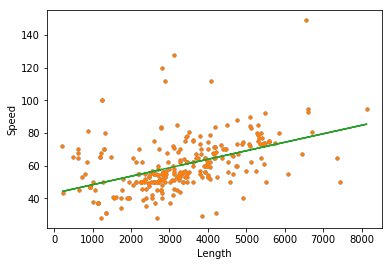

In [112]:
#Graph
#Duration VS Speed
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
length = roller['Length (feet)']
speed = roller['Speed (mph)']
plt.plot(length, speed, '.')
plt.xlabel('Length')
plt.ylabel('Speed')
m,b = np.polyfit(length, speed, 1)
print(m,b)
fit = np.polyfit(length, speed,1)
fit_fn = np.poly1d(fit) 
plt.plot(length, speed,'.', length, fit_fn(length))
# The rollercoaster with longer length tends to have faster speed.
# Possible explanation: with the longer length, it is easier and more likely for the rollercoaster to accelerate and 
# reach a higher speed.

-1.0915585761054236 62.11436188581768


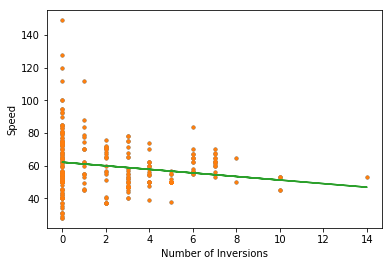

In [113]:
#Graph
#roller.info()
#Number of Inversions VS 
inversion = roller['Number of Inversions']
plt.plot(inversion, speed, '.')
plt.xlabel('Number of Inversions')
plt.ylabel('Speed')
m,b = np.polyfit(inversion, speed, 1)
print(m,b)
fit = np.polyfit(inversion, speed,1)
fit_fn = np.poly1d(fit) 
plt.plot(inversion, speed,'.', inversion, fit_fn(inversion))
# As the number of inversions becomes bigger, the speed becomes more concentrated at around 60.
# Possible Explanation: When there are too many inversions in one round, the speed can't be high because 
# every inversion will possibly reduce the speed.

Text(0,0.5,'CoasterBuzz')

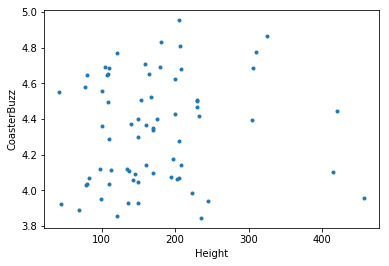

In [127]:
# CoasterBuzz Ranking (Height)
roller = roller.dropna(subset = ['Height (feet)','CoasterBuzz Ranking'])
#roller.info()
height = roller['Height (feet)']
coaster = roller['CoasterBuzz Ranking']
plt.plot(height, coaster, '.')
plt.xlabel('Height')
plt.ylabel('CoasterBuzz')
# From the graph, no obvious relationship

8.157409417774683e-05 4.008913945241229


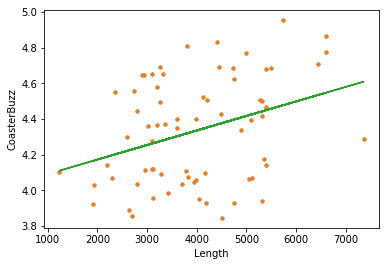

In [123]:
# CoasterBuzz Ranking (Height)
roller = roller.dropna(subset = ['Length (feet)','CoasterBuzz Ranking'])
length_new = roller['Length (feet)']
plt.plot(length_new, coaster, '.')
plt.xlabel('Length')
plt.ylabel('CoasterBuzz')
m,b = np.polyfit(length_new, coaster, 1)
print(m,b)
fit = np.polyfit(length_new, coaster, 1)
fit_fn = np.poly1d(fit) 
plt.plot(length_new, coaster, '.', length_new, fit_fn(length_new))
# There is a relationship which is not obviously seen that as the length is longer, the coasterBuzz ranking is higher.

Text(0,0.5,'CoasterBuzz')

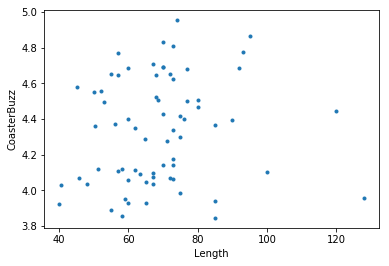

In [134]:
roller = roller.dropna(subset = ['Speed (mph)','CoasterBuzz Ranking'])
speed_new = roller['Speed (mph)']
#roller.info()
plt.plot(speed_new, coaster, '.')
plt.xlabel('Speed')
plt.ylabel('CoasterBuzz')
# No obvious relationship bewteen the two, but the graph is similar with the the graph of height vs coasterbuzz ranking

Text(0,0.5,'CoasterBuzz')

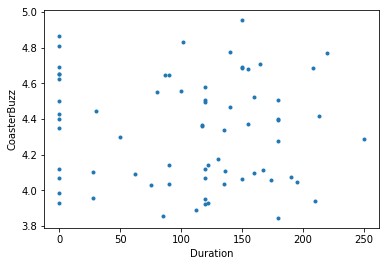

In [142]:
roller = roller.dropna(subset = ['Duration (min:sec)','CoasterBuzz Ranking'])
#roller.info()
roller['Duration (min:sec)'] = roller['Duration (min:sec)'].fillna('0:00')
roller['Duration (min:sec)'] = roller['Duration (min:sec)'].replace(' ', '0:00')

def convert(t):
    time = str(t).split(':')
    time_in_sec = int(time[0])*60+int(time[1])
    return time_in_sec

roller['Duration in sec'] = roller['Duration (min:sec)'].apply(convert)
duration = roller['Duration in sec']
plt.plot(duration, coaster, '.')
plt.xlabel('Duration')
plt.ylabel('CoasterBuzz')
# No obvious pattern is shown here as well. 
# In general, there is no obvious pattern between coasterbuzz ranking and height, speed or duration.
# However, there seems like a linear relationship between the ranking and length.